In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from matplotlib import *


"""
This is a fuzzy expert system to determine your health condition.

Input variables:
1.Blood pressure
2.Cholesterol
3.Blood sugar
4.ECG (Electrocardiography)
5.Heart rate

Output variable:
range_result (a result that shows the health condition.)


Steps:
1.Define the linguistic variables.
2.Rule evaluation
3.Aggregation of outputs
4.Defuzzification
"""


#step 1. Define the linguistic variables.

blood_pressure = np.arange(90, 251)
cholesterol = np.arange(140, 401)
blood_sugar = np.arange(0, 201)
ecg = np.arange(-0.5, 2.6, 0.1)
heart_rate = np.arange(80, 301)
range_result = np.arange(0.00, 4.01, 0.01)
    
blood_pressure_lo = fuzz.trapmf(blood_pressure, [90, 90, 111, 134])
print(len(blood_pressure), len(blood_pressure_lo))
blood_pressure_md = fuzz.trimf(blood_pressure, [127, 139, 153])
blood_pressure_hi = fuzz.trimf(blood_pressure, [142, 157, 172])
blood_pressure_vhi = fuzz.trapmf(blood_pressure, [154, 171, 250, 250])

cholesterol_lo = fuzz.trapmf(cholesterol, [140, 140, 151, 197])
cholesterol_md = fuzz.trimf(cholesterol, [188, 215, 250])
cholesterol_hi = fuzz.trimf(cholesterol, [217, 263, 307])
cholesterol_vhi = fuzz.trapmf(cholesterol, [281, 347, 400, 400])

blood_sugar_true = fuzz.trapmf(blood_sugar, [105, 120, 200, 200])

ecg_normal = fuzz.trapmf(ecg, [-0.5, -0.5, 0, 0.4])
ecg_stt = fuzz.trimf(ecg, [0.2, 1, 1.8])
ecg_hyper = fuzz.trapmf(ecg, [1.4, 1.95, 2.5, 2.5])

heart_rate_lo = fuzz.trapmf(heart_rate, [80, 80, 100, 141])
heart_rate_md = fuzz.trimf(heart_rate, [111, 152, 194])
heart_rate_hi = fuzz.trapmf(heart_rate, [152, 216, 300, 300])

result_healthy = fuzz.trapmf(range_result, [0, 0, 0.25, 1])
result_s1 = fuzz.trimf(range_result, [0, 1, 2])
result_s2 = fuzz.trimf(range_result, [1, 2, 3])
result_s3 = fuzz.trimf(range_result, [2, 3, 4])
result_s4 = fuzz.trapmf(range_result, [3, 3.75, 4, 4])





"""
因為本程式目的為視覺化，將結果繪製為3D模型。
因此每次只考慮兩項變數，
如以下第一部分考慮的是Blood Pressure 與 Cholesterol，
最終對應到第三個變數:range_result，進而將此三變數會製成模型。

"""

"""
設定繪圖所需的X,Y,Z軸
X:Blood pressure
Y:Cholesterol
Z:range_result
"""
X = blood_pressure.reshape((len(blood_pressure), 1))
Y = cholesterol.reshape((1, len(cholesterol)))
Z = np.zeros((len(blood_pressure), len(cholesterol)), dtype = float)




"""
將X與Y值域中，每個(x,y)的組合帶入rule evaluation，計算出對應的range_result(即健康狀況的output)值，並存入Z當中。

EX:
若x=100,y=150 -> range_result = 1.2 -> 存入Z[100,150] = 1.2
"""

for bp in range(len(blood_pressure)):
    for ch in range(len(cholesterol)):
        user_bp = blood_pressure[bp]
        user_chol = cholesterol[ch]
        
        
        #Step 2. Rule evaluation
        blood_pressure_lv_lo = fuzz.interp_membership(blood_pressure, blood_pressure_lo, user_bp)
        blood_pressure_lv_md = fuzz.interp_membership(blood_pressure, blood_pressure_md, user_bp)
        blood_pressure_lv_hi = fuzz.interp_membership(blood_pressure, blood_pressure_hi, user_bp)
        blood_pressure_lv_vhi = fuzz.interp_membership(blood_pressure, blood_pressure_vhi, user_bp)
        cholesterol_lv_lo = fuzz.interp_membership(cholesterol, cholesterol_lo, user_chol)
        cholesterol_lv_md = fuzz.interp_membership(cholesterol, cholesterol_md, user_chol)
        cholesterol_lv_hi = fuzz.interp_membership(cholesterol, cholesterol_hi, user_chol)
        cholesterol_lv_vhi = fuzz.interp_membership(cholesterol, cholesterol_vhi, user_chol)
        
        
        
        # Rules: R8 R13 R19 R24 
        active_healthy = max([blood_pressure_lv_lo, cholesterol_lv_lo])
        sick_healthy = np.fmin(active_healthy, result_healthy)
        # Rules: R9 R14 R20 R25
        active_s1 = max([blood_pressure_lv_md, cholesterol_lv_md])
        sick_s1 = np.fmin(active_s1, result_s1)
        # Rules: R10 R15 R18 R21 R26
        active_s2 = max([blood_pressure_lv_hi, cholesterol_lv_hi])
        sick_s2 = np.fmin(active_s2, result_s2)
        # Rules: R11 R16 R22 R27
        active_s3 = max([blood_pressure_lv_hi, cholesterol_lv_hi])
        sick_s3 = np.fmin(active_s3, result_s3)
        # Rules: R12 R17 R23 R28
        active_s4 = max([blood_pressure_lv_vhi, cholesterol_lv_vhi])
        sick_s4 = np.fmin(active_s4, result_s4)
        
        
        #Step 3.Aggregation of outputs
        aggregation = np.fmax(sick_healthy, np.fmax(sick_s1, np.fmax(sick_s2, np.fmax(sick_s3, sick_s4))))

        #Step 4.Defuzzification
        Z[bp, ch] = fuzz.defuzz(range_result, aggregation, 'centroid')


        
        
        
"""
運用matplotlib繪製3D立體模型：

X,Y,Z為上方程式所設定的不同軸，若要改變軸所代表的變數，則需修改上方的程式碼，
目前為：
X:Blood pressure
Y:Cholesterol
Z:range_result

"""       
        
%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.ocean, linewidth=1, antialiased=False)
#ax1.plot_wireframe(X,Y,Z, cmap=cm.jet)
ax1.set_xlabel('blood pressure')
ax1.set_ylabel('cholesterol')
ax1.set_zlabel('result value')

161 161


In [ ]:

"""
以下程式碼為不同變數組合，
如blood pressure 與 ecg的組合，
程式碼大部份相同，同學只需參考上方的程式碼，做出一個立體圖形即可。
"""



# set (X, Y, Z) for plotting

X = blood_pressure.reshape((len(blood_pressure), 1))
Y = ecg.reshape((1, len(ecg)))
Z = np.zeros((len(blood_pressure), len(ecg)), dtype = float)
print(Z.shape)

for bp in range(len(blood_pressure)):
    for e in range(len(ecg)):
        user_bp = blood_pressure[bp]
        user_ecg = ecg[e]

        blood_pressure_lv_lo = fuzz.interp_membership(blood_pressure, blood_pressure_lo, user_bp)
        blood_pressure_lv_md = fuzz.interp_membership(blood_pressure, blood_pressure_md, user_bp)
        blood_pressure_lv_hi = fuzz.interp_membership(blood_pressure, blood_pressure_hi, user_bp)
        blood_pressure_lv_vhi = fuzz.interp_membership(blood_pressure, blood_pressure_vhi, user_bp)
        ecg_lv_normal = fuzz.interp_membership(ecg, ecg_normal, user_ecg)
        ecg_lv_stt = fuzz.interp_membership(ecg, ecg_stt, user_ecg)
        ecg_lv_hyper = fuzz.interp_membership(ecg, ecg_hyper, user_ecg)

        # R8 R13 R19 R24 
        active_healthy = max([blood_pressure_lv_lo, ecg_lv_normal])
        sick_healthy = np.fmin(active_healthy, result_healthy)

        # R9 R14 R20 R25
        active_s1 = max([blood_pressure_lv_md, ecg_lv_normal])
        sick_s1 = np.fmin(active_s1, result_s1)

        # R10 R15 R18 R21 R26
        active_s2 = max([blood_pressure_lv_hi, ecg_lv_stt])
        sick_s2 = np.fmin(active_s2, result_s2)

        # R11 R16 R22 R27
        active_s3 = max([blood_pressure_lv_hi, ecg_lv_hyper])
        sick_s3 = np.fmin(active_s3, result_s3)

        # R12 R17 R23 R28
        active_s4 = max([blood_pressure_lv_vhi, ecg_lv_hyper])
        sick_s4 = np.fmin(active_s4, result_s4)

        aggregation = np.fmax(sick_healthy, np.fmax(sick_s1, np.fmax(sick_s2, np.fmax(sick_s3, sick_s4))))

        #Z[bp, ch] = fuzz.defuzz(range_result, aggregation, 'centroid')
        Z[bp, e] = fuzz.defuzz(range_result, aggregation, 'centroid')


%matplotlib notebook
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
surf = ax2.plot_surface(X, Y, Z, cmap=cm.ocean, linewidth=1, antialiased=False)
#ax1.plot_wireframe(X,Y,Z, cmap=cm.jet)
ax2.set_xlabel('blood pressure')
ax2.set_ylabel('ECG')
ax2.set_zlabel('result value')


<IPython.core.display.Javascript object>


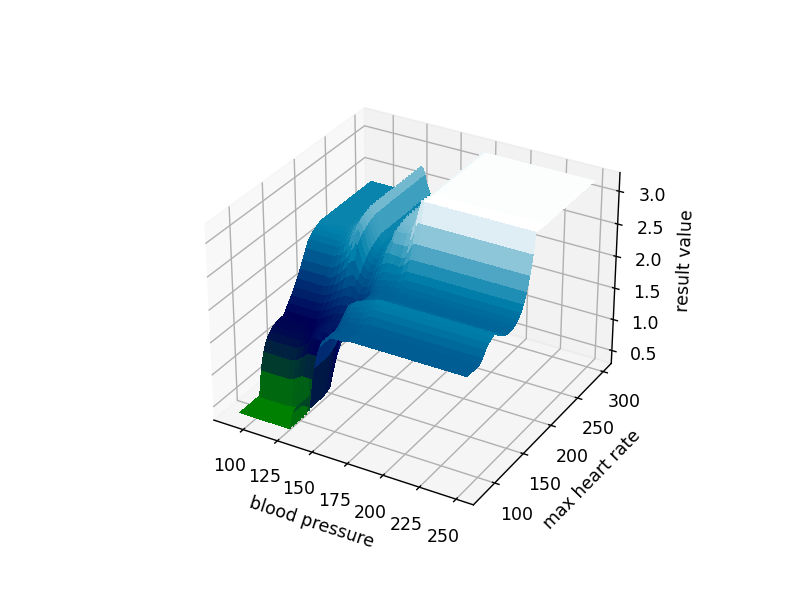

Text(0.5, 0, 'result value')

In [6]:
# set (X, Y, Z) for plotting

X = blood_pressure.reshape((len(blood_pressure), 1))
Y = heart_rate.reshape((1, len(heart_rate)))
Z = np.zeros((len(blood_pressure), len(heart_rate)), dtype = float)

for bp in range(len(blood_pressure)):
    for he in range(len(heart_rate)):
        user_bp = blood_pressure[bp]
        user_hr = heart_rate[he]

        blood_pressure_lv_lo = fuzz.interp_membership(blood_pressure, blood_pressure_lo, user_bp)
        blood_pressure_lv_md = fuzz.interp_membership(blood_pressure, blood_pressure_md, user_bp)
        blood_pressure_lv_hi = fuzz.interp_membership(blood_pressure, blood_pressure_hi, user_bp)
        blood_pressure_lv_vhi = fuzz.interp_membership(blood_pressure, blood_pressure_vhi, user_bp)
        heart_rate_lv_lo = fuzz.interp_membership(heart_rate, heart_rate_lo, user_hr)
        heart_rate_lv_md = fuzz.interp_membership(heart_rate, heart_rate_md, user_hr)
        heart_rate_lv_hi = fuzz.interp_membership(heart_rate, heart_rate_hi, user_hr)
        
        # R8 R13 R19 R24 
        active_healthy = max([blood_pressure_lv_lo, heart_rate_lv_lo])
        sick_healthy = np.fmin(active_healthy, result_healthy)
        
        # R9 R14 R20 R25
        active_s1 = max([blood_pressure_lv_md, heart_rate_lv_md])
        sick_s1 = np.fmin(active_s1, result_s1)

        # R10 R15 R18 R21 R26
        active_s2 = max([blood_pressure_lv_hi, heart_rate_lv_md])
        sick_s2 = np.fmin(active_s2, result_s2)

        # R11 R16 R22 R27
        active_s3 = max([blood_pressure_lv_hi, heart_rate_lv_hi])
        sick_s3 = np.fmin(active_s3, result_s3)

        # R12 R17 R23 R28
        active_s4 = max([blood_pressure_lv_vhi, heart_rate_lv_hi])
        sick_s4 = np.fmin(active_s4, result_s4)

        aggregation = np.fmax(sick_healthy, np.fmax(sick_s1, np.fmax(sick_s2, np.fmax(sick_s3, sick_s4))))

        #Z[bp, ch] = fuzz.defuzz(range_result, aggregation, 'centroid')
        Z[bp, he] = fuzz.defuzz(range_result, aggregation, 'centroid')

        
%matplotlib notebook
fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')
surf = ax3.plot_surface(X, Y, Z, cmap=cm.ocean, linewidth=1, antialiased=False)
#ax1.plot_wireframe(X,Y,Z, cmap=cm.jet)
ax3.set_xlabel('blood pressure')
ax3.set_ylabel('max heart rate')
ax3.set_zlabel('result value')